# Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime

warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Dataset

In [2]:
data_2019 = pd.read_csv('Jan_2019_ontime.csv')
data_2020 = pd.read_csv('Jan_2020_ontime.csv')

In [3]:
#Menambahakan informasi 'year' pada kedua dataset.
data_2019['year'] = 2019
data_2020['year'] = 2020

In [4]:
dataset_main = pd.concat([data_2019,data_2020])

In [5]:
dataset_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191331 entries, 0 to 607345
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   DAY_OF_MONTH           1191331 non-null  int64  
 1   DAY_OF_WEEK            1191331 non-null  int64  
 2   OP_UNIQUE_CARRIER      1191331 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  1191331 non-null  int64  
 4   OP_CARRIER             1191331 non-null  object 
 5   TAIL_NUM               1188090 non-null  object 
 6   OP_CARRIER_FL_NUM      1191331 non-null  int64  
 7   ORIGIN_AIRPORT_ID      1191331 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  1191331 non-null  int64  
 9   ORIGIN                 1191331 non-null  object 
 10  DEST_AIRPORT_ID        1191331 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    1191331 non-null  int64  
 12  DEST                   1191331 non-null  object 
 13  DEP_TIME               1168315 non-null  float64
 14  DEP_DEL15          

In [6]:
dataset_main = dataset_main.rename(columns={"OP_UNIQUE_CARRIER": "AIRLINE_CODE","DEP_DEL15":"DELAYED"})

In [7]:
# We want to process all flights excluding Cancelled and Diverted
dataset_main = dataset_main[(dataset_main['CANCELLED']==0) & (dataset_main['DIVERTED']==0)]
dataset_main.head()

,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_CODE,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEP_TIME,DELAYED,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,year
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN,2019
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN,2019
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN,2019
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN,2019
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN,2019


# Preprocessing

In [8]:
# Menghapus kolom yang sekiranya tidak diperlukan
# 'OP_UNIQUE_CARRIER' dan 'OP_CARRIER_AIRLINE_ID' dapat diwakilkan 'OP_CARRIER'
# 'TAIL_NUM' tidak memiliki informasi penting
# 'ORIGIN_AIRPORT_ID' dan 'ORIGIN_AIRPORT_SEQ_ID' dapat diwakilkan 'ORIGIN'
# 'DEST_AIRPORT_ID' dan 'DEST_AIRPORT_SEQ_ID' dapat diwakilkan 'DEST'
# 'CANCELLED' tidak diperlukan
# 'DIVERTED'  tidak diperlukan
# 'Unnamed: 21' tidak diperlukan
# 'ARR_DEL15' tidak diperlukan
dataset_main = dataset_main.drop(['OP_CARRIER_AIRLINE_ID','TAIL_NUM','OP_CARRIER_FL_NUM','ORIGIN_AIRPORT_ID',
                                  'ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_ID',
                                  'DEST_AIRPORT_SEQ_ID','Unnamed: 21','OP_CARRIER','ARR_DEL15',
                                  'CANCELLED', 'DIVERTED'], axis=1)
dataset_main.head()

,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_CODE,ORIGIN,DEST,DEP_TIME,DELAYED,DEP_TIME_BLK,ARR_TIME,DISTANCE,year
0,1,2,9E,GNV,ATL,601.0,0.0,0600-0659,722.0,300.0,2019
1,1,2,9E,MSP,CVG,1359.0,0.0,1400-1459,1633.0,596.0,2019
2,1,2,9E,DTW,CVG,1215.0,0.0,1200-1259,1329.0,229.0,2019
3,1,2,9E,TLH,ATL,1521.0,0.0,1500-1559,1625.0,223.0,2019
4,1,2,9E,ATL,FSM,1847.0,0.0,1900-1959,1940.0,579.0,2019


## Cek Missing Value

In [10]:
dataset_main.isna().sum()

DAY_OF_MONTH    0
DAY_OF_WEEK     0
AIRLINE_CODE    0
ORIGIN          0
DEST            0
DEP_TIME        0
DELAYED         0
DEP_TIME_BLK    0
ARR_TIME        0
DISTANCE        0
year            0
dtype: int64

In [11]:
# Drop Missing Value
dataset_main.dropna(inplace=True)
dataset_main.isna().sum()

DAY_OF_MONTH    0
DAY_OF_WEEK     0
AIRLINE_CODE    0
ORIGIN          0
DEST            0
DEP_TIME        0
DELAYED         0
DEP_TIME_BLK    0
ARR_TIME        0
DISTANCE        0
year            0
dtype: int64

## Cek Duplicated Data

In [12]:
dataset_main.duplicated().sum()

2

In [13]:
dataset_main = dataset_main.drop_duplicates()
dataset_main.duplicated().sum()

0

# Exporatory Data Analysis

In [14]:
dataset_main.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,DELAYED,ARR_TIME,DISTANCE,year
count,1.165229e+06,1.165229e+06,1.165229e+06,1.165229e+06,1.165229e+06,1.165229e+06,1.165229e+06
mean,1.590670e+01,3.894313e+00,1.331726e+03,1.542632e-01,1.481149e+03,8.010049e+02,2.019514e+03
std,8.989838e+00,1.916468e+00,4.962457e+02,3.612011e-01,5.242425e+02,5.902832e+02,4.997959e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,3.100000e+01,2.019000e+03
25%,8.000000e+00,2.000000e+00,9.200000e+02,0.000000e+00,1.101000e+03,3.680000e+02,2.019000e+03
50%,1.600000e+01,4.000000e+00,1.327000e+03,0.000000e+00,1.515000e+03,6.410000e+02,2.020000e+03
75%,2.400000e+01,5.000000e+00,1.739000e+03,0.000000e+00,1.919000e+03,1.042000e+03,2.020000e+03
max,3.100000e+01,7.000000e+00,2.400000e+03,1.000000e+00,2.400000e+03,5.095000e+03,2.020000e+03


## Count Delay and Not Delay

In [15]:
df1 = dataset_main.groupby(['DELAYED']).count()['DAY_OF_MONTH'].reset_index()
df1.columns = ['Delay','Count']
df1.head()

,Delay,Count
0,0.0,985477
1,1.0,179752


In [16]:
df1['Total'] = df1['Count'].sum()
df1['Percentage'] = round((df1['Count']/df1['Total']*100),2)
df1

,Delay,Count,Total,Percentage
0,0.0,985477,1165229,84.57
1,1.0,179752,1165229,15.43


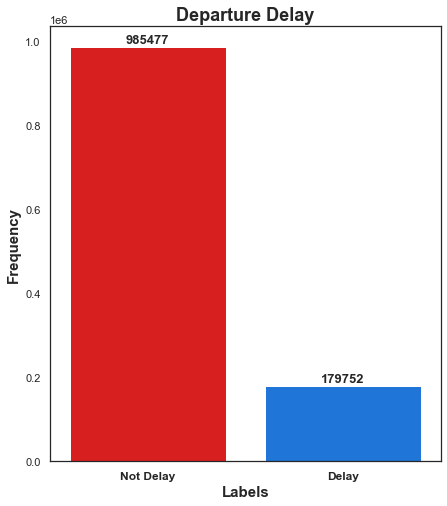

In [18]:
sns.set(style="white")

# membuat bar chart
plt.figure(figsize = (7, 8))
ax = sns.barplot(
    x = 'Delay',
    y = 'Count',
    data = df1,
    palette = ['#f70000','#0073f7']
)
ax.set_xticklabels(['Not Delay','Delay'], fontsize = 12, fontweight = 'semibold')

# membuat judul dan merubah nama xlabel & ylabel
plt.title('Departure Delay', fontsize = 18, fontweight = 'bold')
plt.xlabel('Labels', fontsize = 15, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 15, fontweight = 'bold');

# memunculkan angka di tiap bar
for x in ax.patches:
    ax.annotate(
            format(x.get_height(), '.0f'),
            (x.get_x() + x.get_width() / 2., x.get_height()), 
            ha = 'center',
            va = 'center',
            fontweight = 'bold',
            size = 13,
            xytext = (0, 7), 
            textcoords = 'offset points')

plt.savefig('target.png', bbox_inches = 'tight')

## Delay due to Day_of_Week

In [19]:
week = dataset_main[['DAY_OF_WEEK','DELAYED','year']].groupby(['DAY_OF_WEEK','year']).sum().reset_index()
week['PERCENTAGE'] = week['DELAYED']/(week['DELAYED'].sum())*100
week

,DAY_OF_WEEK,year,DELAYED,PERCENTAGE
0,1,2019,13485.0,7.502003
1,1,2020,11125.0,6.189083
2,2,2019,14251.0,7.928145
3,2,2020,7526.0,4.186880
4,3,2019,16758.0,9.322845
5,3,2020,9519.0,5.295630
6,4,2019,19029.0,10.586252
7,4,2020,13879.0,7.721194
8,5,2019,13523.0,7.523143
9,5,2020,15703.0,8.735925


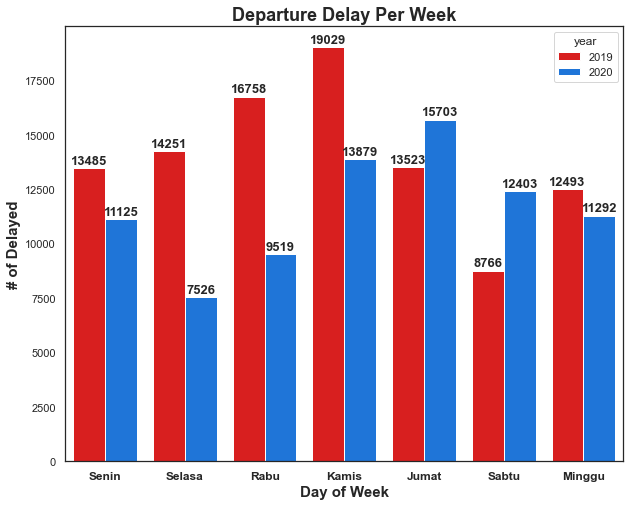

In [21]:
sns.set(style="white")

# membuat bar chart
plt.figure(figsize = (10, 8))
ax = sns.barplot(
    x = 'DAY_OF_WEEK',
    y = 'DELAYED',
    hue = 'year',
    data = week,
    palette = ['#f70000','#0073f7']
)

ax.set_xticklabels(['Senin','Selasa','Rabu','Kamis','Jumat','Sabtu','Minggu'], fontsize = 12, fontweight = 'semibold')

# membuat judul dan merubah nama xlabel & ylabel
plt.title('Departure Delay Per Week', fontsize = 18, fontweight = 'bold')
plt.xlabel('Day of Week', fontsize = 15, fontweight = 'bold')
plt.ylabel('# of Delayed', fontsize = 15, fontweight = 'bold');

# memunculkan angka di tiap bar
for x in ax.patches:
    ax.annotate(
            format(x.get_height(), '.0f'),
            (x.get_x() + x.get_width() / 2., x.get_height()), 
            ha = 'center',
            va = 'center',
            fontweight = 'bold',
            size = 13,
            xytext = (0, 7), 
            textcoords = 'offset points'
    )

plt.savefig('delayed per week.png', bbox_inches = 'tight')

## Delays due to day_of_mnth 

In [22]:
month = dataset_main[['DAY_OF_MONTH','DELAYED','year']].groupby(['DAY_OF_MONTH','year']).sum().reset_index()
month['PERCENTAGE'] = month['DELAYED']/(month['DELAYED'].sum())*100
month

,DAY_OF_MONTH,year,DELAYED,PERCENTAGE
0,1,2019,3771.0,2.097890
1,1,2020,2427.0,1.350194
2,2,2019,5059.0,2.814433
3,2,2020,2939.0,1.635030
4,3,2019,3706.0,2.061729
...,...,...,...,...
57,29,2020,1254.0,0.697628
58,30,2019,3245.0,1.805265
59,30,2020,2029.0,1.128777
60,31,2019,3874.0,2.155192


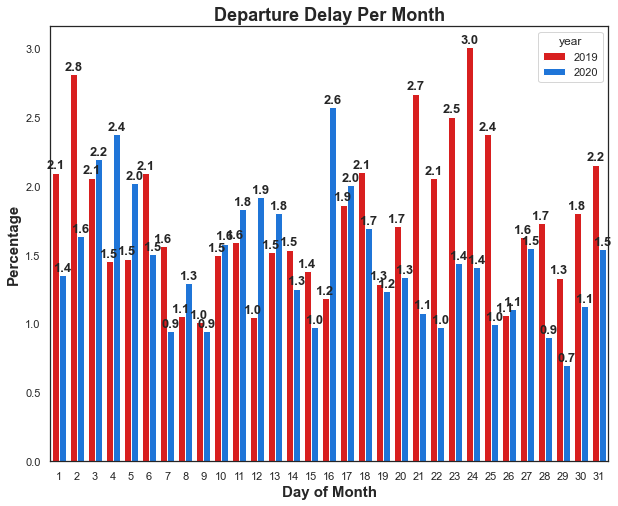

In [23]:
sns.set(style="white")


# membuat bar chart
plt.figure(figsize = (10, 8))
ax = sns.barplot(
    x = 'DAY_OF_MONTH',
    y = 'PERCENTAGE',
    hue = 'year',
    data = month,
    palette = ['#f70000','#0073f7']
    
)


# membuat judul dan merubah nama xlabel & ylabel
plt.title('Departure Delay Per Month', fontsize = 18, fontweight = 'bold')
plt.xlabel('Day of Month', fontsize = 15, fontweight = 'bold')
plt.ylabel('Percentage', fontsize = 15, fontweight = 'bold');

# memunculkan angka di tiap bar
for x in ax.patches:
    ax.annotate(
            format(x.get_height(), '.1f'),
            (x.get_x() + x.get_width() / 2., x.get_height()), 
            ha = 'center',
            va = 'center',
            fontweight = 'bold',
            size = 13,
            xytext = (0, 7), 
            textcoords = 'offset points'
    ) 

## Which airport of Origin stands out in delays? (Percentage)

In [25]:
dest_later = dataset_main[['ORIGIN','DELAYED']].groupby(['ORIGIN']).agg({'DELAYED':['count','sum']}).reset_index()
dest_later.columns = ['Origin_Airport','Number_of_Flight','Delayed']
dest_later['PERCENTAGE'] = dest_later['Delayed']*100/dest_later['Number_of_Flight']
dest_later.sort_values(by=['PERCENTAGE'],ascending=False,inplace=True)
dest_later.head()

,Origin_Airport,Number_of_Flight,Delayed,PERCENTAGE
233,OGD,17,7.0,41.176471
143,HGR,22,9.0,40.909091
17,ART,47,18.0,38.297872
235,OGS,57,20.0,35.087719
18,ASE,1632,565.0,34.620098


In [26]:
org_top5p = dest_later.head()
org_top5p

,Origin_Airport,Number_of_Flight,Delayed,PERCENTAGE
233,OGD,17,7.0,41.176471
143,HGR,22,9.0,40.909091
17,ART,47,18.0,38.297872
235,OGS,57,20.0,35.087719
18,ASE,1632,565.0,34.620098


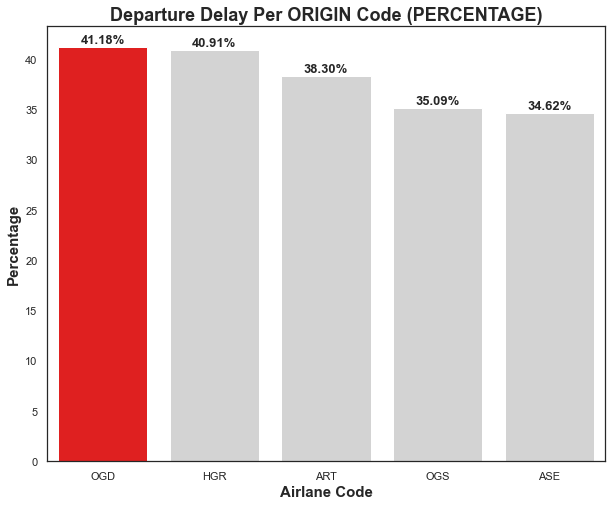

In [27]:
sns.set(style="white")

# highlight the PERCENTAGE terbesar
highlight3 = ['red' if (x == org_top5p['PERCENTAGE'].max()) else 'lightgrey' for x in org_top5p['PERCENTAGE']]

# membuat bar chart
plt.figure(figsize = (10, 8))
ax = sns.barplot(
    x = 'Origin_Airport',
    y = 'PERCENTAGE',
    data = org_top5p,
    palette = highlight3
)


# membuat judul dan merubah nama xlabel & ylabel
plt.title('Departure Delay Per ORIGIN Code (PERCENTAGE)', fontsize = 18, fontweight = 'bold')
plt.xlabel('Airlane Code', fontsize = 15, fontweight = 'bold')
plt.ylabel('Percentage', fontsize = 15, fontweight = 'bold');

# memunculkan angka di tiap bar
for x in ax.patches:
    ax.annotate(
            format(x.get_height(), '.2f')+'%',
            (x.get_x() + x.get_width() / 2., x.get_height()), 
            ha = 'center',
            va = 'center',
            fontweight = 'bold',
            size = 13,
            xytext = (0, 7), 
            textcoords = 'offset points'
    ) 

plt.savefig('eparture Delay Per ORIGIN Code.png', bbox_inches = 'tight')

## Which airport of Origin stands out in delays? (Absolute)

In [24]:
dest_later1 = dataset_main[['ORIGIN','DELAYED']].groupby('ORIGIN').agg({'DELAYED':['count','sum']}).reset_index()
dest_later1.columns = ['Origin_Airport','Number_of_Flight','Delayed']
dest_later1['PERCENTAGE'] = dest_later1['Delayed']*100/dest_later1['Number_of_Flight']
dest_later1.sort_values(by=['Delayed'],ascending=False,inplace=True)
dest_later1.head()

,Origin_Airport,Number_of_Flight,Delayed,PERCENTAGE
240,ORD,48102,10639.0,22.117583
91,DFW,46523,8559.0,18.397352
19,ATL,62807,7737.0,12.318691
90,DEN,38373,6154.0,16.037318
70,CLT,38641,5717.0,14.795166


In [25]:
org_top5 = dest_later1.head()
org_top5

,Origin_Airport,Number_of_Flight,Delayed,PERCENTAGE
240,ORD,48102,10639.0,22.117583
91,DFW,46523,8559.0,18.397352
19,ATL,62807,7737.0,12.318691
90,DEN,38373,6154.0,16.037318
70,CLT,38641,5717.0,14.795166


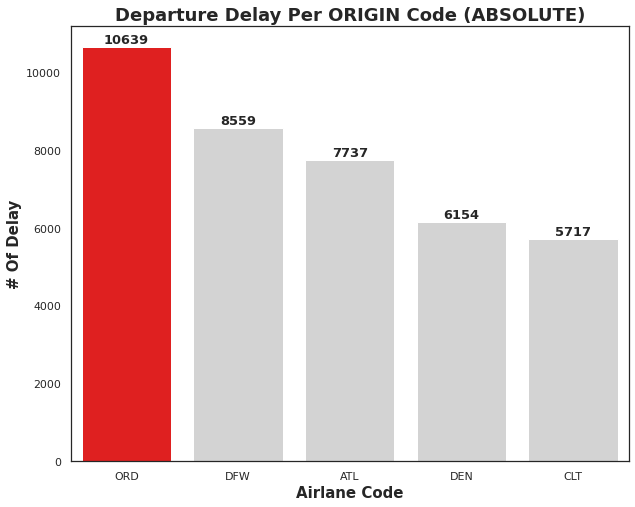

In [26]:
sns.set(style="white")

# highlight the PERCENTAGE terbesar
highlight3 = ['red' if (x == org_top5['Delayed'].max()) else 'lightgrey' for x in org_top5['Delayed']]

# membuat bar chart
plt.figure(figsize = (10, 8))
ax = sns.barplot(
    x = 'Origin_Airport',
    y = 'Delayed',
    data = org_top5,
    palette = highlight3
)


# membuat judul dan merubah nama xlabel & ylabel
plt.title('Departure Delay Per ORIGIN Code (ABSOLUTE)', fontsize = 18, fontweight = 'bold')
plt.xlabel('Airlane Code', fontsize = 15, fontweight = 'bold')
plt.ylabel('# Of Delay', fontsize = 15, fontweight = 'bold');

# memunculkan angka di tiap bar
for x in ax.patches:
    ax.annotate(
            format(x.get_height(), '.0f'),
            (x.get_x() + x.get_width() / 2., x.get_height()), 
            ha = 'center',
            va = 'center',
            fontweight = 'bold',
            size = 13,
            xytext = (0, 7), 
            textcoords = 'offset points'
    ) 


## Which CARRIER stands out in delays? (Percentage)

In [29]:
dest_later2 = dataset_main[['AIRLINE_CODE','DELAYED']].groupby('AIRLINE_CODE').agg({'DELAYED':['count','sum']}).reset_index()
dest_later2.columns = ['Airlines','Number_of_Flight','Delayed']
dest_later2['PERCENTAGE'] = dest_later2['Delayed']*100/dest_later2['Number_of_Flight']
dest_later2.sort_values(by=['PERCENTAGE'],ascending=False,inplace=True)
dest_later2.head()

,Airlines,Number_of_Flight,Delayed,PERCENTAGE
3,B6,48016,10035.0,20.899284
7,G4,14357,2804.0,19.530543
6,F9,21802,4212.0,19.319329
9,MQ,48994,8947.0,18.261420
12,OO,131269,23330.0,17.772665


In [30]:
carr_top5p = dest_later2.head()
carr_top5p

,Airlines,Number_of_Flight,Delayed,PERCENTAGE
3,B6,48016,10035.0,20.899284
7,G4,14357,2804.0,19.530543
6,F9,21802,4212.0,19.319329
9,MQ,48994,8947.0,18.261420
12,OO,131269,23330.0,17.772665


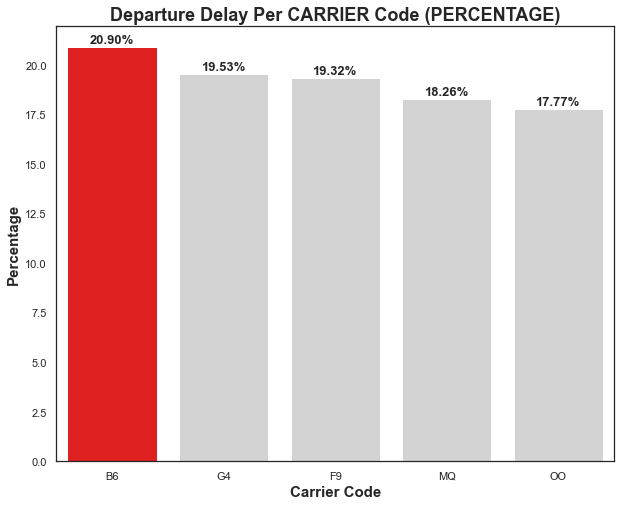

In [31]:
sns.set(style="white")

# highlight the PERCENTAGE terbesar
highlight3 = ['red' if (x == carr_top5p['PERCENTAGE'].max()) else 'lightgrey' for x in carr_top5p['PERCENTAGE']]

# membuat bar chart
plt.figure(figsize = (10, 8))
ax = sns.barplot(
    x = 'Airlines',
    y = 'PERCENTAGE',
    data = carr_top5p,
    palette = highlight3
)


# membuat judul dan merubah nama xlabel & ylabel
plt.title('Departure Delay Per CARRIER Code (PERCENTAGE)', fontsize = 18, fontweight = 'bold')
plt.xlabel('Carrier Code', fontsize = 15, fontweight = 'bold')
plt.ylabel('Percentage', fontsize = 15, fontweight = 'bold');

# memunculkan angka di tiap bar
for x in ax.patches:
    ax.annotate(
            format(x.get_height(), '.2f')+'%',
            (x.get_x() + x.get_width() / 2., x.get_height()), 
            ha = 'center',
            va = 'center',
            fontweight = 'bold',
            size = 13,
            xytext = (0, 7), 
            textcoords = 'offset points'
    ) 

plt.savefig('Departure Delay Per CARRIER Code.png', bbox_inches = 'tight')

## Which CARRIER stands out in delays? (Absolute)

In [31]:
dest_later3 = dataset_main[['AIRLINE_CODE','DELAYED']].groupby('AIRLINE_CODE').agg({'DELAYED':['count','sum']}).reset_index()
dest_later3.columns = ['Airlines','Number_of_Flight','Delayed']
dest_later3['PERCENTAGE'] = dest_later3['Delayed']*100/dest_later3['Number_of_Flight']
dest_later3.sort_values(by=['Delayed'],ascending=False,inplace=True)
dest_later3.head()

,Airlines,Number_of_Flight,Delayed,PERCENTAGE
14,WN,214943,31796.0,14.792759
12,OO,131269,23330.0,17.772665
1,AA,150826,22949.0,15.215546
4,DL,153331,17483.0,11.402130
13,UA,94145,14492.0,15.393276


In [32]:
carr_top5 = dest_later3.head()
carr_top5

,Airlines,Number_of_Flight,Delayed,PERCENTAGE
14,WN,214943,31796.0,14.792759
12,OO,131269,23330.0,17.772665
1,AA,150826,22949.0,15.215546
4,DL,153331,17483.0,11.402130
13,UA,94145,14492.0,15.393276


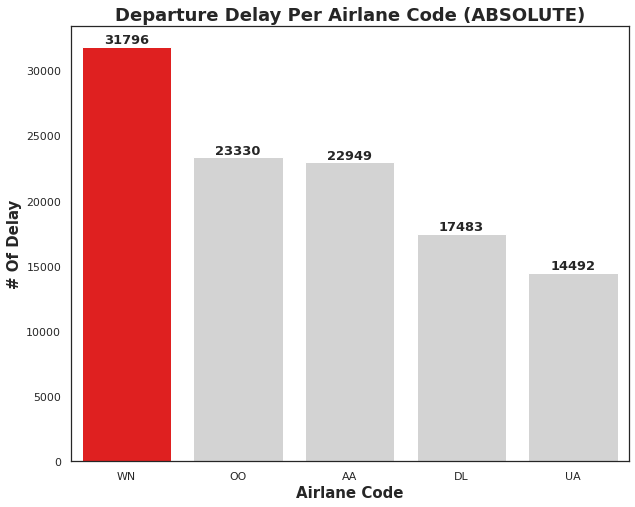

In [33]:
sns.set(style="white")

# highlight the PERCENTAGE terbesar
highlight3 = ['red' if (x == carr_top5['Delayed'].max()) else 'lightgrey' for x in carr_top5['Delayed']]

# membuat bar chart
plt.figure(figsize = (10, 8))
ax = sns.barplot(
    x = 'Airlines',
    y = 'Delayed',
    data = carr_top5,
    palette = highlight3
)


# membuat judul dan merubah nama xlabel & ylabel
plt.title('Departure Delay Per Airlane Code (ABSOLUTE)', fontsize = 18, fontweight = 'bold')
plt.xlabel('Airlane Code', fontsize = 15, fontweight = 'bold')
plt.ylabel('# Of Delay', fontsize = 15, fontweight = 'bold');

# memunculkan angka di tiap bar
for x in ax.patches:
    ax.annotate(
            format(x.get_height(), '.0f'),
            (x.get_x() + x.get_width() / 2., x.get_height()), 
            ha = 'center',
            va = 'center',
            fontweight = 'bold',
            size = 13,
            xytext = (0, 7), 
            textcoords = 'offset points'
    ) 

# Feature Engineering

## Create Time of Day

In [33]:
early_morning  =['0001-0559']
Morning        =['0600-0659','0700-0759','0800-0859','0900-0959','1000-1059','1100-1159']
AfterNoon      =['1200-1259','1300-1359','1400-1459','1500-1559','1600-1659','1700-1759']
Night          =['1800-1859','1900-1959','2000-2059','2100-2159','2200-2259','2300-2359']

In [34]:
def time_day(x):
    x = x['DEP_TIME_BLK']
    if x in early_morning:
        return ('Early_Morning')
    elif x in Morning:
        return('Morning')
    elif x in AfterNoon:
        return('AfterNoon')
    elif x in Night:
        return ('Night')
    else:
        return ('Others')

In [35]:
dataset_main['Time_of_Day']=dataset_main.apply(lambda x : time_day(x),axis=1)
dataset_main.head()

,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_CODE,ORIGIN,DEST,DEP_TIME,DELAYED,DEP_TIME_BLK,ARR_TIME,DISTANCE,year,Time_of_Day
0,1,2,9E,GNV,ATL,601.0,0.0,0600-0659,722.0,300.0,2019,Morning
1,1,2,9E,MSP,CVG,1359.0,0.0,1400-1459,1633.0,596.0,2019,AfterNoon
2,1,2,9E,DTW,CVG,1215.0,0.0,1200-1259,1329.0,229.0,2019,AfterNoon
3,1,2,9E,TLH,ATL,1521.0,0.0,1500-1559,1625.0,223.0,2019,AfterNoon
4,1,2,9E,ATL,FSM,1847.0,0.0,1900-1959,1940.0,579.0,2019,Night


In [36]:
dataset_main['DEP_TIME_BLK_N'] = dataset_main.DEP_TIME_BLK.replace(['0600-0659','0700-0759','0800-0859','1700-1759','1200-1259','1100-1159','1500-1559',
                                 '1000-1059','1400-1459','0900-0959','1600-1659','1800-1859','1300-1359','1900-1959',
                                 '2000-2059','2100-2159','0001-0559','2200-2259','2300-2359'],
                               [6,7,8,17,12,11,15,10,14,9,16,18,13,19,20,21,1,22,23])

In [38]:
time_dy = dataset_main[['Time_of_Day','DELAYED']].groupby('Time_of_Day').agg({'DELAYED':['count','sum']}).reset_index()
time_dy.columns = ['Time_of_Day','Number_of_Flight','Delayed']
time_dy['PERCENTAGE'] = time_dy['Delayed']*100/time_dy['Number_of_Flight']
time_dy.sort_values(by=['PERCENTAGE'],ascending=False,inplace=True)

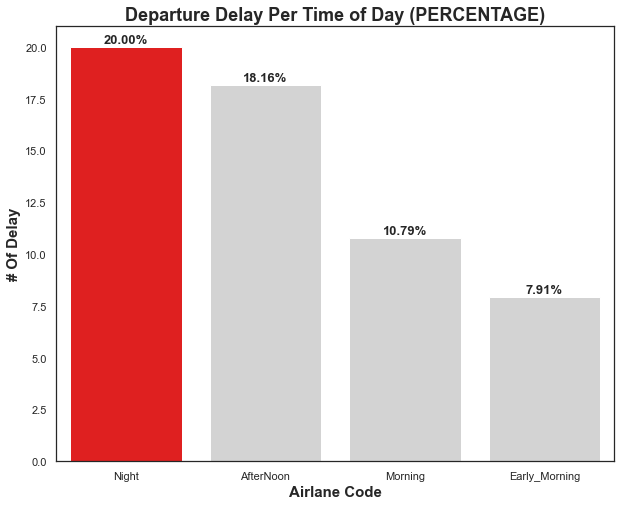

In [40]:
sns.set(style="white")

# highlight the PERCENTAGE terbesar
highlight3 = ['red' if (x == time_dy['PERCENTAGE'].max()) else 'lightgrey' for x in time_dy['PERCENTAGE']]

# membuat bar chart
plt.figure(figsize = (10, 8))
ax = sns.barplot(
    x = 'Time_of_Day',
    y = 'PERCENTAGE',
    data = time_dy,
    palette = highlight3
)


# membuat judul dan merubah nama xlabel & ylabel
plt.title('Departure Delay Per Time of Day (PERCENTAGE)', fontsize = 18, fontweight = 'bold')
plt.xlabel('Airlane Code', fontsize = 15, fontweight = 'bold')
plt.ylabel('# Of Delay', fontsize = 15, fontweight = 'bold');

# memunculkan angka di tiap bar
for x in ax.patches:
    ax.annotate(
            format(x.get_height(), '.2f')+'%',
            (x.get_x() + x.get_width() / 2., x.get_height()), 
            ha = 'center',
            va = 'center',
            fontweight = 'bold',
            size = 13,
            xytext = (0, 7), 
            textcoords = 'offset points'
    ) 
plt.savefig('Departure Delay Per Time of Day.png', bbox_inches = 'tight')

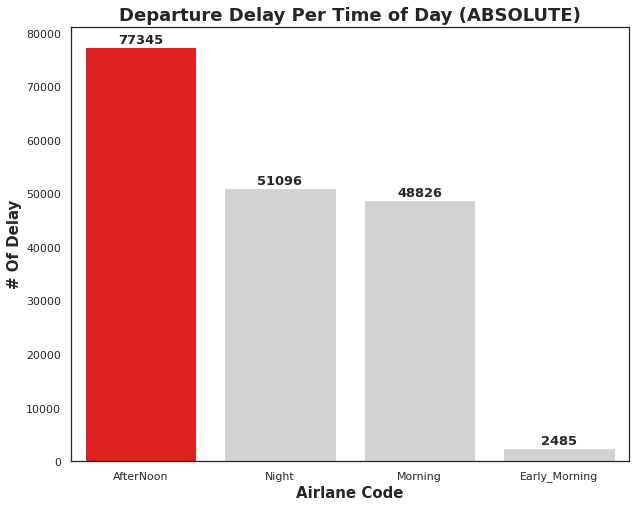

In [40]:
sns.set(style="white")

# highlight the PERCENTAGE terbesar
highlight3 = ['red' if (x == time_dy['Delayed'].max()) else 'lightgrey' for x in time_dy['Delayed']]

# membuat bar chart
plt.figure(figsize = (10, 8))
ax = sns.barplot(
    x = 'Time_of_Day',
    y = 'Delayed',
    data = time_dy,
    palette = highlight3
)


# membuat judul dan merubah nama xlabel & ylabel
plt.title('Departure Delay Per Time of Day (ABSOLUTE)', fontsize = 18, fontweight = 'bold')
plt.xlabel('Airlane Code', fontsize = 15, fontweight = 'bold')
plt.ylabel('# Of Delay', fontsize = 15, fontweight = 'bold');

# memunculkan angka di tiap bar
for x in ax.patches:
    ax.annotate(
            format(x.get_height(), '.0f'),
            (x.get_x() + x.get_width() / 2., x.get_height()), 
            ha = 'center',
            va = 'center',
            fontweight = 'bold',
            size = 13,
            xytext = (0, 7), 
            textcoords = 'offset points'
    ) 

In [41]:
df= dataset_main.copy()
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_CODE,ORIGIN,DEST,DEP_TIME,DELAYED,DEP_TIME_BLK,ARR_TIME,DISTANCE,year,Time_of_Day,DEP_TIME_BLK_N
0,1,2,9E,GNV,ATL,601.0,0.0,0600-0659,722.0,300.0,2019,Morning,6
1,1,2,9E,MSP,CVG,1359.0,0.0,1400-1459,1633.0,596.0,2019,AfterNoon,14
2,1,2,9E,DTW,CVG,1215.0,0.0,1200-1259,1329.0,229.0,2019,AfterNoon,12
3,1,2,9E,TLH,ATL,1521.0,0.0,1500-1559,1625.0,223.0,2019,AfterNoon,15
4,1,2,9E,ATL,FSM,1847.0,0.0,1900-1959,1940.0,579.0,2019,Night,19


# Feature Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder
# Encode Categorical data
le =LabelEncoder()
Category = ['AIRLINE_CODE','ORIGIN','DEST','DEP_TIME_BLK_N']
for i in Category:
    df[i]=le.fit_transform(df[i])

# Feature Selection

In [115]:
df_use = df.copy()
df_use = df_use[['DAY_OF_MONTH','DAY_OF_WEEK','AIRLINE_CODE','ORIGIN','DEST','DEP_TIME_BLK_N',
                 'DEP_TIME','DELAYED','ARR_TIME','DISTANCE','year']]
df_use.head()

,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_CODE,ORIGIN,DEST,DEP_TIME_BLK_N,DEP_TIME,DELAYED,ARR_TIME,DISTANCE,year
0,1,2,0,130,19,1,601.0,0.0,722.0,300.0,2019
1,1,2,0,227,82,9,1359.0,0.0,1633.0,596.0,2019
2,1,2,0,97,82,7,1215.0,0.0,1329.0,229.0,2019
3,1,2,0,331,19,10,1521.0,0.0,1625.0,223.0,2019
4,1,2,0,19,122,14,1847.0,0.0,1940.0,579.0,2019


# SPLIT DATA

In [116]:
df_train = df_use[df_use['year']==2019]
df_test = df_use[df_use['year']==2020]

In [117]:
X_train = df_train.drop(['DELAYED','year'],axis=1)
y_train = df_train[['DELAYED']]
X_test = df_test.drop(['DELAYED','year'],axis = 1)
y_test = df_test['DELAYED']

In [97]:
#from sklearn.model_selection import train_test_split
#x = df_use.drop('DEP_DEL15',axis=1)
#y = df_use['DEP_DEL15']

#X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [98]:
#X_train = df_train.drop(['DEP_DEL15','year'],axis=1)
#y_train = df_train['DEP_DEL15']
#X_test = df_test.drop(['DEP_DEL15','year'],axis = 1)
#y_test = df_test['DEP_DEL15']

# Standard Scaller

In [118]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# SMOTE

In [122]:
# IMPORTANT! ONLY SAMPLING IN TRAIN DATA
from imblearn.over_sampling import SMOTE
sm  =SMOTE(random_state=42)

X_train_s ,y_train_s = sm.fit_resample(X_train,y_train)

In [123]:
print(y_train.value_counts())
print(y_train_s.value_counts())

DELAYED
0.0        467657
1.0         98305
dtype: int64
DELAYED
0.0        467657
1.0        467657
dtype: int64


# UnderSampling

In [124]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_u ,y_train_u = rus.fit_resample(X_train,y_train)

In [125]:
print(y_train.value_counts())
print(y_train_u.value_counts())

DELAYED
0.0        467657
1.0         98305
dtype: int64
DELAYED
0.0        98305
1.0        98305
dtype: int64


# OverSampling

In [126]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_o ,y_train_o = ros.fit_resample(X_train,y_train)

In [127]:
print(y_train.value_counts())
print(y_train_o.value_counts())

DELAYED
0.0        467657
1.0         98305
dtype: int64
DELAYED
0.0        467657
1.0        467657
dtype: int64


# Modelling

In [128]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.ensemble import AdaBoostClassifier


# Modelling use Undersampling

In [129]:
model = {'RandomForest' : RandomForestClassifier(),
         'Gaussian NB' : GaussianNB(),
         'XGBoost' : XGBClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Ada Boost':AdaBoostClassifier()
         }
result={}
Accuracy = []
Precision = []
Recall = []
for key,value in model.items():
    
    model = value
    model.fit(X_train_u, y_train_u)
    y_pred = model.predict(X_test)
    F1 = f1_score(y_test, y_pred)
    result[key]= F1
    
    Accuracy.append(accuracy_score(y_test, y_pred))
    Precision.append(precision_score(y_test, y_pred))
    Recall.append(recall_score(y_test, y_pred))


base_model = pd.DataFrame(result.items(), columns=['Base Model', 'F1_Score'])
base_model = base_model.sort_values('F1_Score', ascending=False).reset_index(drop=True)
base_model['Accuracy']=Accuracy
base_model['Precision']=Precision
base_model['Recall']=Recall
base_model

[13:13:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Base Model,F1_Score,Accuracy,Precision,Recall
0,XGBoost,0.647828,0.873856,0.523862,0.788820
1,RandomForest,0.629601,0.572585,0.177301,0.589218
2,Decision Tree,0.514931,0.887030,0.562048,0.764509
3,Ada Boost,0.323896,0.793020,0.377801,0.808329
4,Gaussian NB,0.272581,0.624782,0.214471,0.661289


# Modelling use Oversampling

In [130]:
model = {'RandomForest' : RandomForestClassifier(),
         'Gaussian NB' : GaussianNB(),
         'XGBoost' : XGBClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Ada Boost':AdaBoostClassifier()
         }
result={}
Accuracy = []
Precision = []
Recall = []
for key,value in model.items():
    
    model = value
    model.fit(X_train_o, y_train_o)
    y_pred = model.predict(X_test)
    F1 = f1_score(y_test, y_pred)
    result[key]= F1
    
    Accuracy.append(accuracy_score(y_test, y_pred))
    Precision.append(precision_score(y_test, y_pred))
    Recall.append(recall_score(y_test, y_pred))


base_model = pd.DataFrame(result.items(), columns=['Base Model', 'F1_Score'])
base_model = base_model.sort_values('F1_Score', ascending=False).reset_index(drop=True)
base_model['Accuracy']=Accuracy
base_model['Precision']=Precision
base_model['Recall']=Recall
base_model

[13:17:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Base Model,F1_Score,Accuracy,Precision,Recall
0,RandomForest,0.721239,0.927984,0.760938,0.685476
1,XGBoost,0.656179,0.572102,0.177200,0.589672
2,Decision Tree,0.598790,0.891426,0.575988,0.762312
3,Ada Boost,0.321393,0.871254,0.519368,0.706889
4,Gaussian NB,0.272510,0.620665,0.212319,0.660933


# Modelling use SMOTE

In [131]:
model = {'RandomForest' : RandomForestClassifier(),
         'Gaussian NB' : GaussianNB(),
         'XGBoost' : XGBClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Ada Boost':AdaBoostClassifier()
         }
result={}
Accuracy = []
Precision = []
Recall = []
for key,value in model.items():
    
    model = value
    model.fit(X_train_s, y_train_s)
    y_pred = model.predict(X_test)
    F1 = f1_score(y_test, y_pred)
    result[key]= F1
    
    Accuracy.append(accuracy_score(y_test, y_pred))
    Precision.append(precision_score(y_test, y_pred))
    Recall.append(recall_score(y_test, y_pred))


base_model = pd.DataFrame(result.items(), columns=['Base Model', 'F1_Score'])
base_model = base_model.sort_values('F1_Score', ascending=False).reset_index(drop=True)
base_model['Accuracy']=Accuracy
base_model['Precision']=Precision
base_model['Recall']=Recall
base_model

[13:24:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Base Model,F1_Score,Accuracy,Precision,Recall
0,XGBoost,0.735761,0.926257,0.742789,0.699707
1,RandomForest,0.720604,0.568630,0.176788,0.594534
2,Decision Tree,0.576490,0.934397,0.812861,0.672020
3,Ada Boost,0.335374,0.854305,0.476494,0.729603
4,Gaussian NB,0.272535,0.678736,0.233278,0.596388
